In [1]:
# Third-party
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import gary.coordinates as gc

## K2, Field 8

Rough coordinates from [this plot](http://keplerscience.arc.nasa.gov/K2/images/Field8/field8-final.png).

In [2]:
field_center = coord.SkyCoord(ra=16*u.deg, dec=5*u.deg)

_field_pts = np.meshgrid(np.linspace(9, 23, 100),
                         np.linspace(-2, 12, 100))
field_pts = coord.SkyCoord(ra=np.ravel(_field_pts[0]) * u.deg, 
                           dec=np.ravel(_field_pts[1]) * u.deg)

## LM10 model of the Sgr stream

N-body stream model from [Law & Majewski (2010)](http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2010ApJ...714..229L&db_key=AST&link_type=ABSTRACT&high=51a39ba3d713936).

In [3]:
lm10 = ascii.read("/Users/adrian/projects/streams/data/simulation/LM10/SgrTriax_DYN.dat")
print(lm10.colnames)

['Lambda', 'Beta', 'ra', 'dec', 'l', 'b', 'xgc', 'ygc', 'zgc', 'xsun', 'ysun', 'zsun', 'x4', 'y4', 'z4', 'u', 'v', 'w', 'dist', 'vgsr', 'mul', 'mub', 'mua', 'mud', 'Pcol', 'Lmflag']


In [4]:
lm10_coords = coord.SkyCoord(ra=lm10['ra']*u.deg, 
                             dec=lm10['dec']*u.deg)

In [5]:
lm10_sgr = lm10_coords.transform_to(gc.Sagittarius)
field_sgr = field_pts.transform_to(gc.Sagittarius)

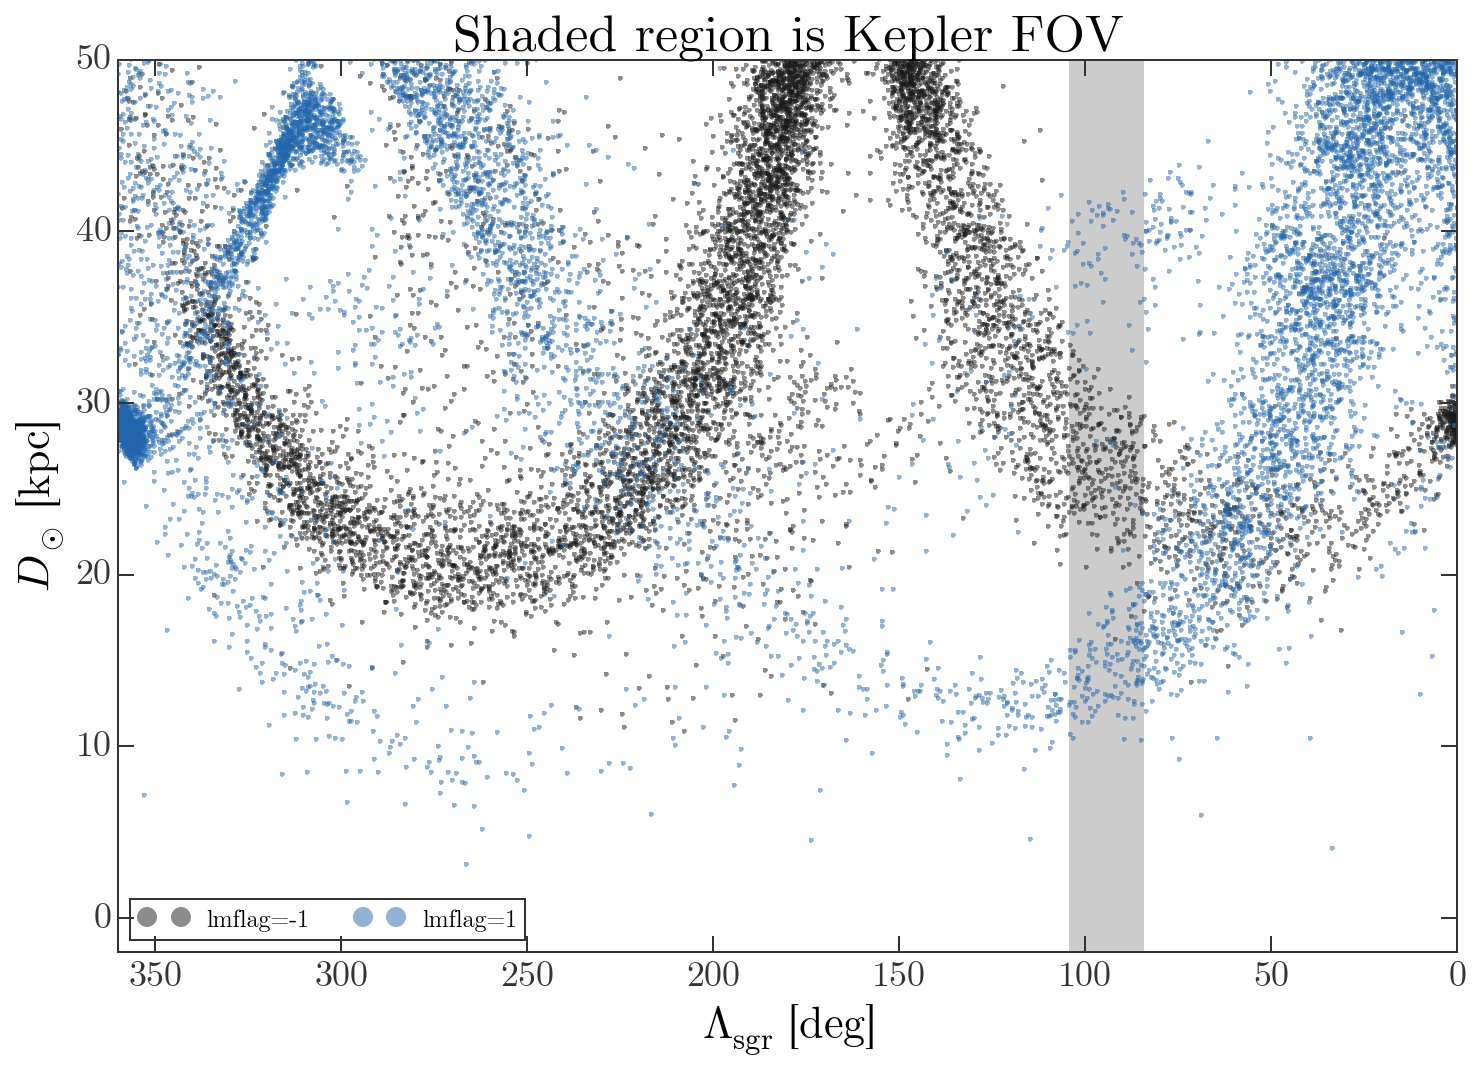

In [14]:
fig = plt.figure(figsize=(12,8))

plt.fill_betweenx(np.linspace(-2,50,10), field_sgr.Lambda.degree.min(), field_sgr.Lambda.degree.max(),
                  color='#cccccc', label='K2 - Field 8')

# for lmflag in [-2,-1,1,2]:
for lmflag in [-1,1]:
    ix = (lm10['Lmflag'] == lmflag) & (lm10_sgr.Beta.degree < 0.)
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10['dist'][ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

plt.title("Shaded region is Kepler FOV")
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(360, 0)
plt.ylim(-2, 50)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$D_\odot$ [kpc]")

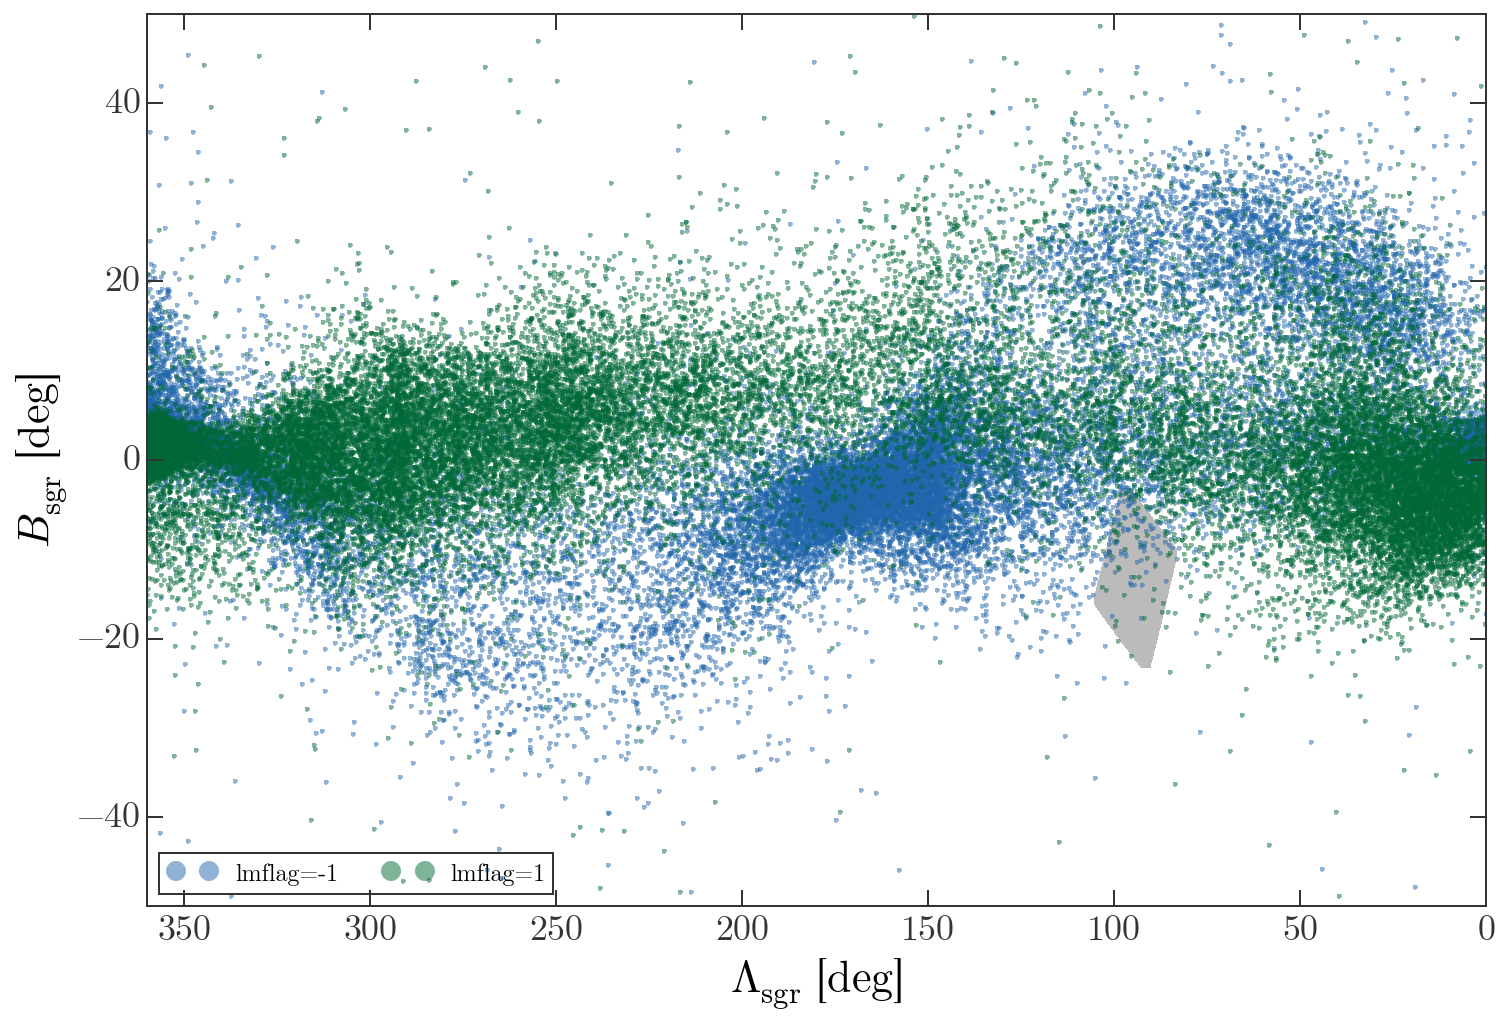

In [15]:
fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = lm10['Lmflag'] == lmflag
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10_sgr.Beta.degree[ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(360, 0)
plt.ylim(-50, 50)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$B_{\rm sgr}$ [deg]")

---

## SDSS F stars

I did a really crude [SQL query on SDSS / SEGUE](http://skyserver.sdss.org/dr12/en/tools/search/sql.aspx) to get F stars in this region. The query was:

```SQL
SELECT st.ra, st.dec, st.psfMag_u, st.psfMag_g, st.psfMag_r, st.psfMag_i, st.psfMag_z, 
       sp.teffadop, sp.fehadop, sp.loggadop, sp.ELODIERVFINAL, sp.ELODIERVFINALerr, sp.snr, sp.flag
FROM specobjall so
JOIN sppparams sp ON so.specobjid = sp.specobjid and so.sciencePrimary=1
JOIN Star st on so.specobjid = st.specobjid
--- F star temperatures...?
WHERE sp.teffadop  BETWEEN 6000 and 7600
      AND sp.snr > 20
      AND st.ra BETWEEN 9 and 23 
      AND st.dec BETWEEN -2 and 12
```

Then I repeated for G stars:

```SQL
SELECT st.ra, st.dec, st.psfMag_u, st.psfMag_g, st.psfMag_r, st.psfMag_i, st.psfMag_z, 
       sp.teffadop, sp.fehadop, sp.loggadop, sp.ELODIERVFINAL, sp.ELODIERVFINALerr, sp.snr, sp.flag
FROM specobjall so
JOIN sppparams sp ON so.specobjid = sp.specobjid and so.sciencePrimary=1
JOIN Star st on so.specobjid = st.specobjid
--- F star temperatures...?
WHERE sp.teffadop  BETWEEN 5200 and 6000
      AND sp.snr > 20
      AND st.ra BETWEEN 9 and 23 
      AND st.dec BETWEEN -2 and 12
```

In [16]:
sdss_fstars = ascii.read("/Users/adrian/Downloads/sdss_f_stars_k2_field8.csv")
print(sdss_fstars.colnames)

['ra', 'dec', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'teffadop', 'fehadop', 'loggadop', 'ELODIERVFINAL', 'ELODIERVFINALerr', 'snr', 'flag']


In [17]:
fstars_c = coord.SkyCoord(ra=sdss_fstars['ra'] * u.deg,
                          dec=sdss_fstars['dec'] * u.deg)
fstars_sgr = fstars_c.transform_to(gc.Sagittarius)

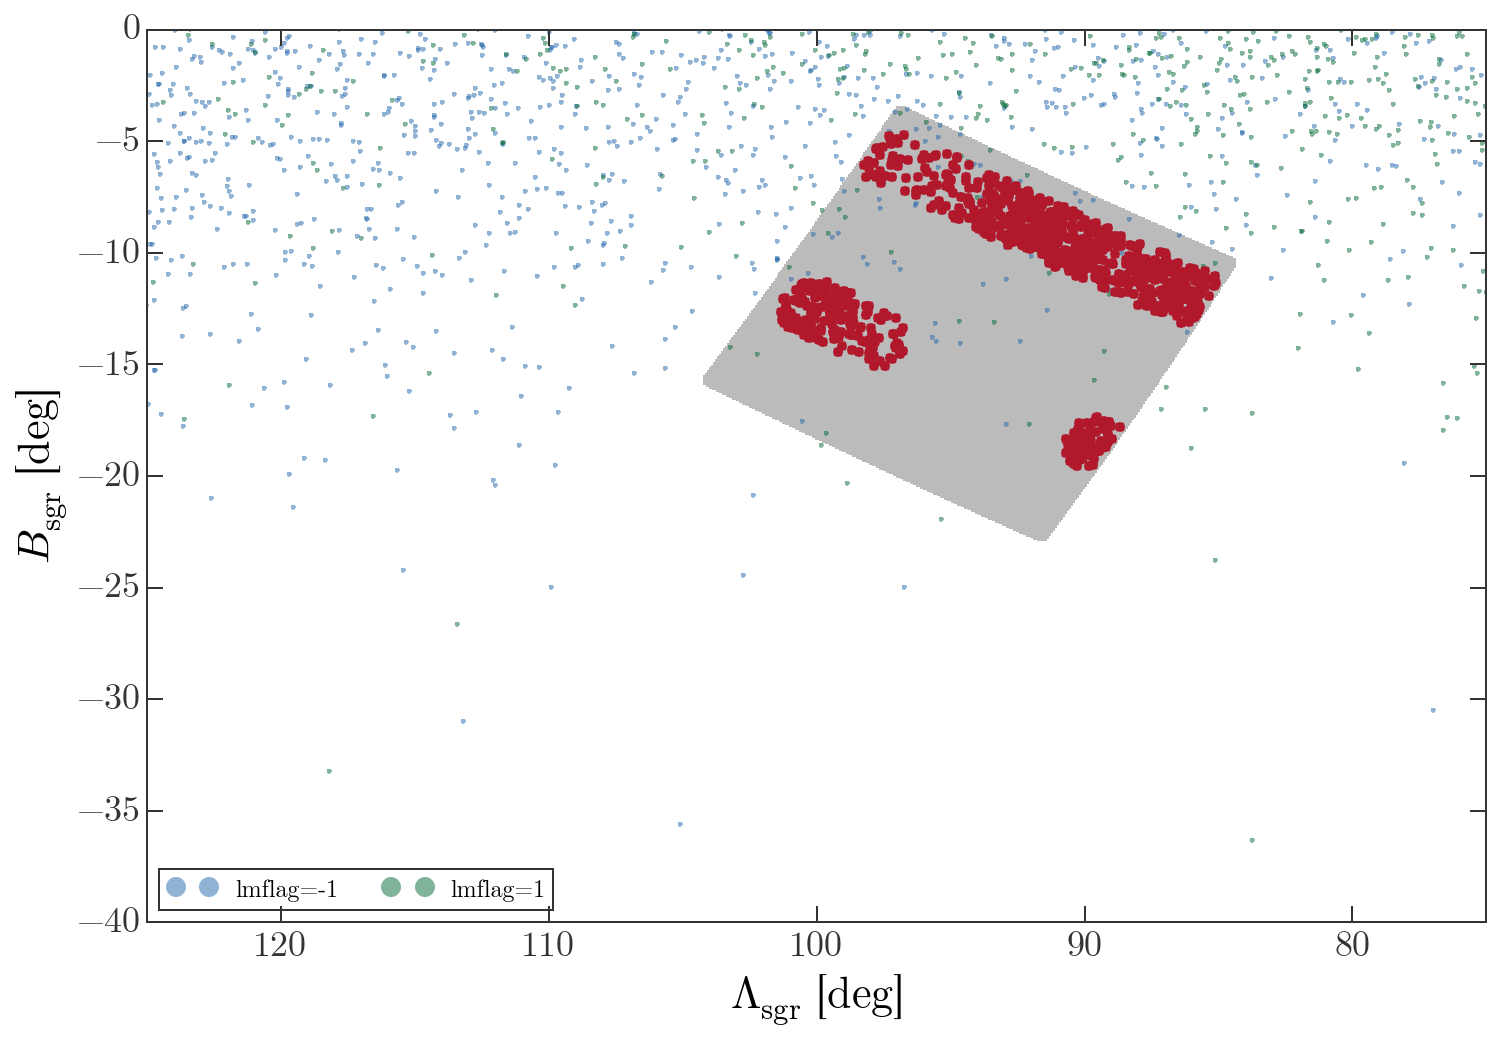

In [18]:
fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = lm10['Lmflag'] == lmflag
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10_sgr.Beta.degree[ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

plt.plot(fstars_sgr.Lambda.degree, fstars_sgr.Beta.degree, 
         marker='o', alpha=1., linestyle='none')
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(125, 75)
plt.ylim(-40, 0)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$B_{\rm sgr}$ [deg]")

Convert the radial velocities to the GSR, to compare to the model

In [19]:
fstars_vgsr = gc.vhel_to_vgsr(fstars_c, sdss_fstars['ELODIERVFINAL']*u.km/u.s)

In [20]:
fstar_mask = (fstars_vgsr.value < 125.) & (fstars_vgsr.value > 50)
fstar_mask = np.ones_like(fstar_mask).astype(bool)

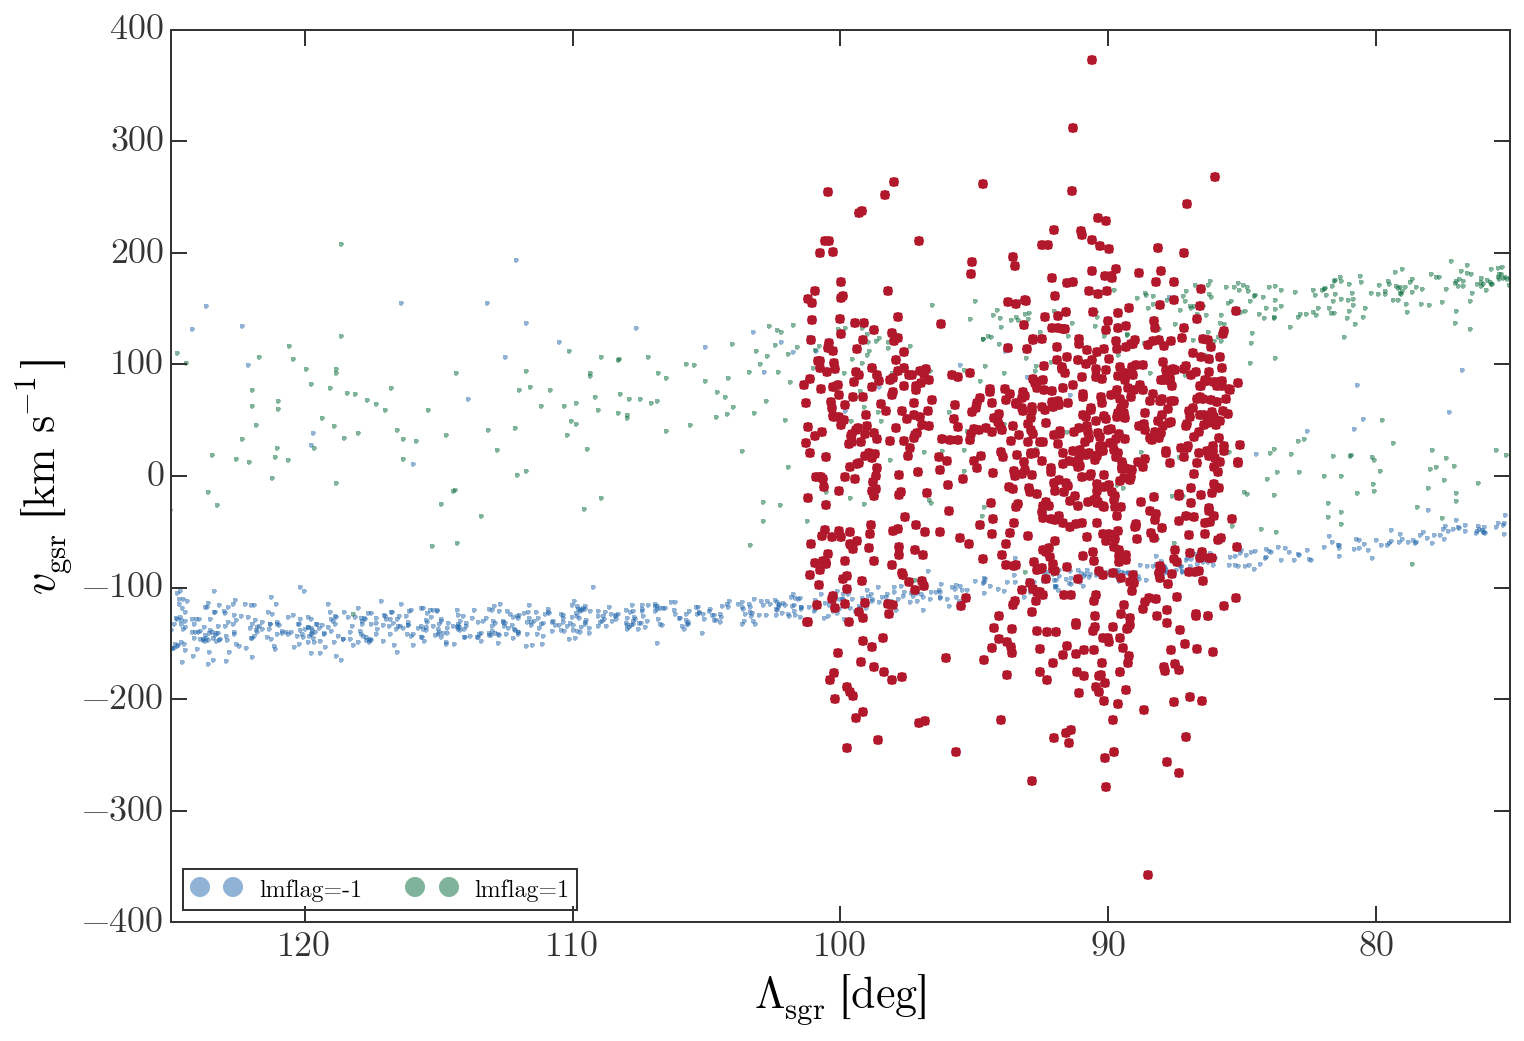

In [21]:
fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree*1000, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = (lm10['Lmflag'] == lmflag) & (lm10_sgr.Beta.degree < 0.)
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10['vgsr'][ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

l, = plt.plot(fstars_sgr.Lambda.degree[fstar_mask], fstars_vgsr.value[fstar_mask], 
              marker='o', alpha=1., linestyle='none')
plt.plot(fstars_sgr.Lambda.degree[~fstar_mask], fstars_vgsr.value[~fstar_mask], 
         marker='o', alpha=0.3, linestyle='none', color=l.get_color())
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(125, 75)
plt.ylim(-400, 400)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$v_{\rm gsr}$ [km s$^{-1}$]")

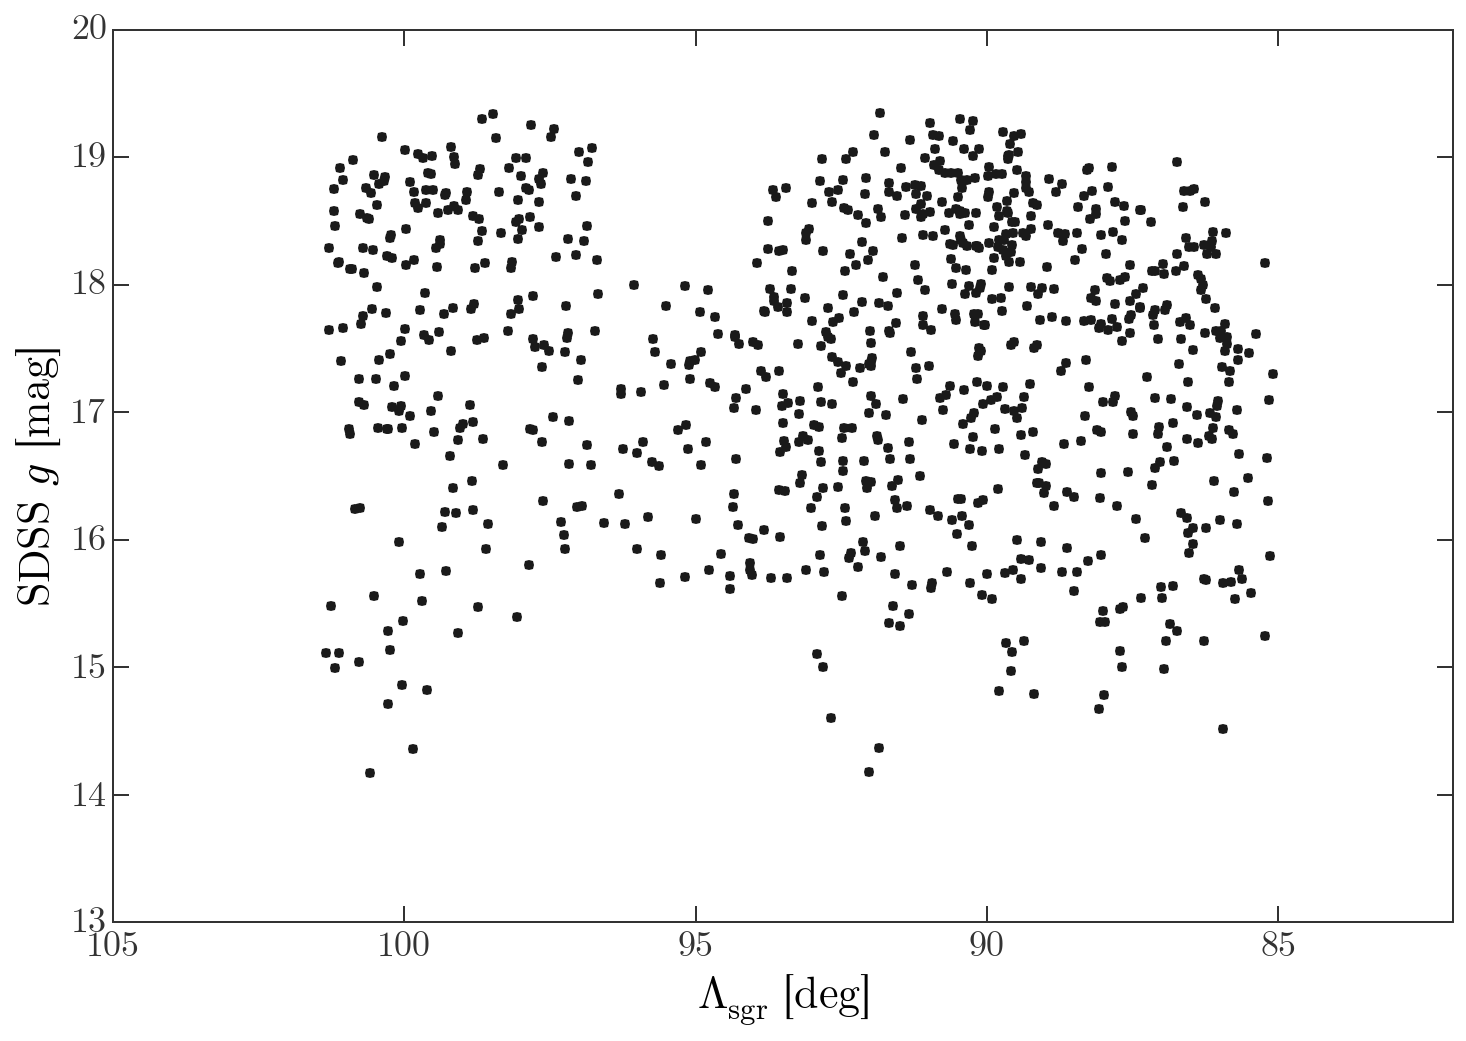

In [25]:
fig = plt.figure(figsize=(12,8))

l, = plt.plot(fstars_sgr.Lambda.degree, sdss_fstars['psfMag_g'],
              marker='o', alpha=1., linestyle='none')
# plt.plot(fstars_sgr.Lambda.degree[~fstar_mask], sdss_fstars['psfMag_g'][~fstar_mask],
#          marker='o', alpha=0.3, linestyle='none', color=l.get_color())
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(105, 82)
plt.ylim(13, 20)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"SDSS $g$ [mag]")

## G stars

In [6]:
sdss_gstars = ascii.read("/Users/adrian/Downloads/sdss_g_stars_k2_field8.csv")
print(sdss_gstars.colnames)

['ra', 'dec', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'teffadop', 'fehadop', 'loggadop', 'ELODIERVFINAL', 'ELODIERVFINALerr', 'snr', 'flag']


In [12]:
gstars_c = coord.SkyCoord(ra=sdss_gstars['ra'] * u.deg,
                          dec=sdss_gstars['dec'] * u.deg)
gstars_sgr = gstars_c.transform_to(gc.Sagittarius)
gstars_vgsr = gc.vhel_to_vgsr(gstars_c, sdss_gstars['ELODIERVFINAL']*u.km/u.s)

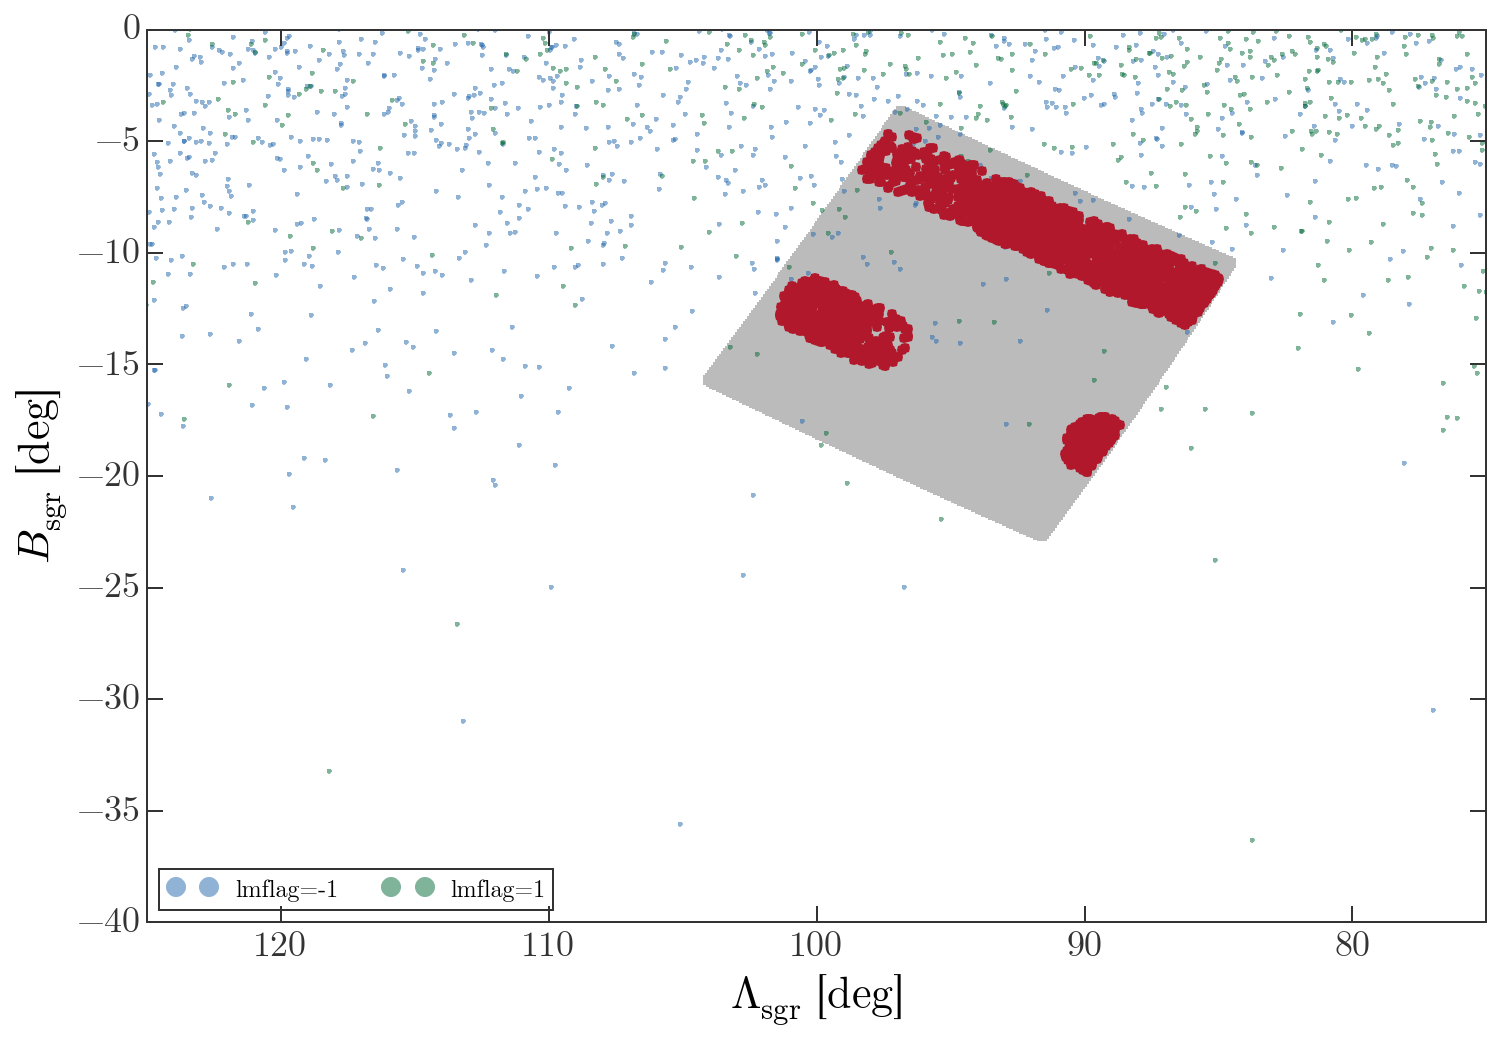

In [8]:
fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = lm10['Lmflag'] == lmflag
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10_sgr.Beta.degree[ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

plt.plot(gstars_sgr.Lambda.degree, gstars_sgr.Beta.degree, 
         marker='o', alpha=1., linestyle='none')
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(125, 75)
plt.ylim(-40, 0)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$B_{\rm sgr}$ [deg]")

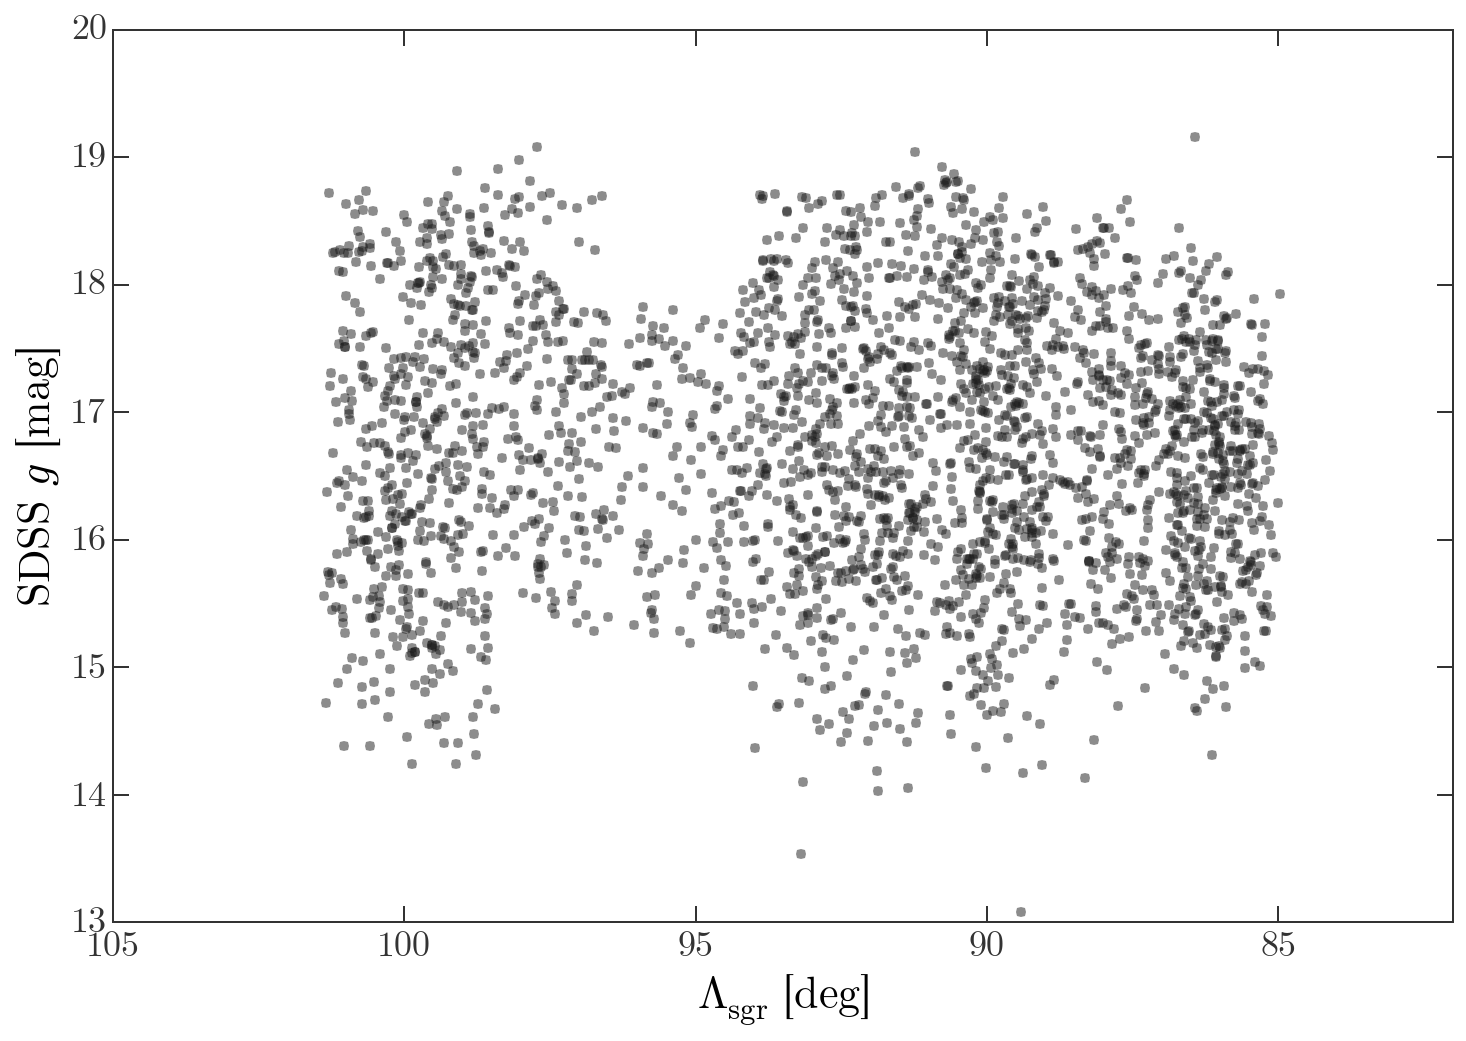

In [11]:
fig = plt.figure(figsize=(12,8))

l, = plt.plot(gstars_sgr.Lambda.degree, sdss_gstars['psfMag_r'],
              marker='o', alpha=0.5, linestyle='none')
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(105, 82)
plt.ylim(13, 20)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"SDSS $g$ [mag]")

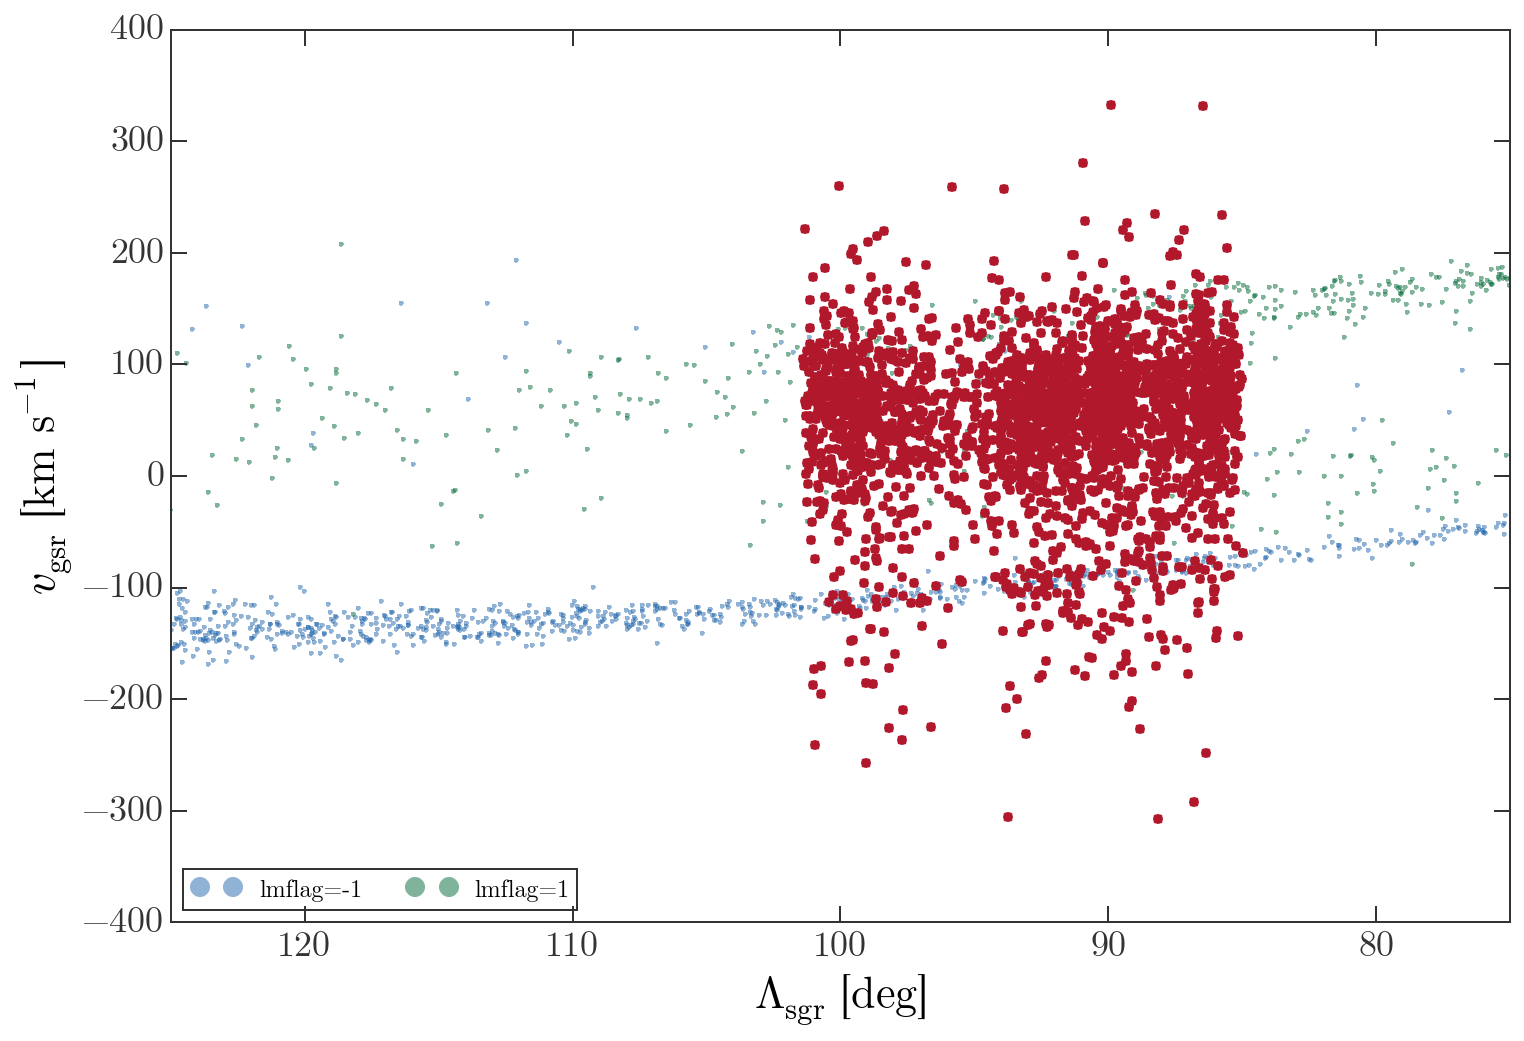

In [13]:
fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree*1000, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = (lm10['Lmflag'] == lmflag) & (lm10_sgr.Beta.degree < 0.)
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10['vgsr'][ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

l, = plt.plot(gstars_sgr.Lambda.degree, gstars_vgsr.value, 
              marker='o', alpha=1., linestyle='none')
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(125, 75)
plt.ylim(-400, 400)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$v_{\rm gsr}$ [km s$^{-1}$]")

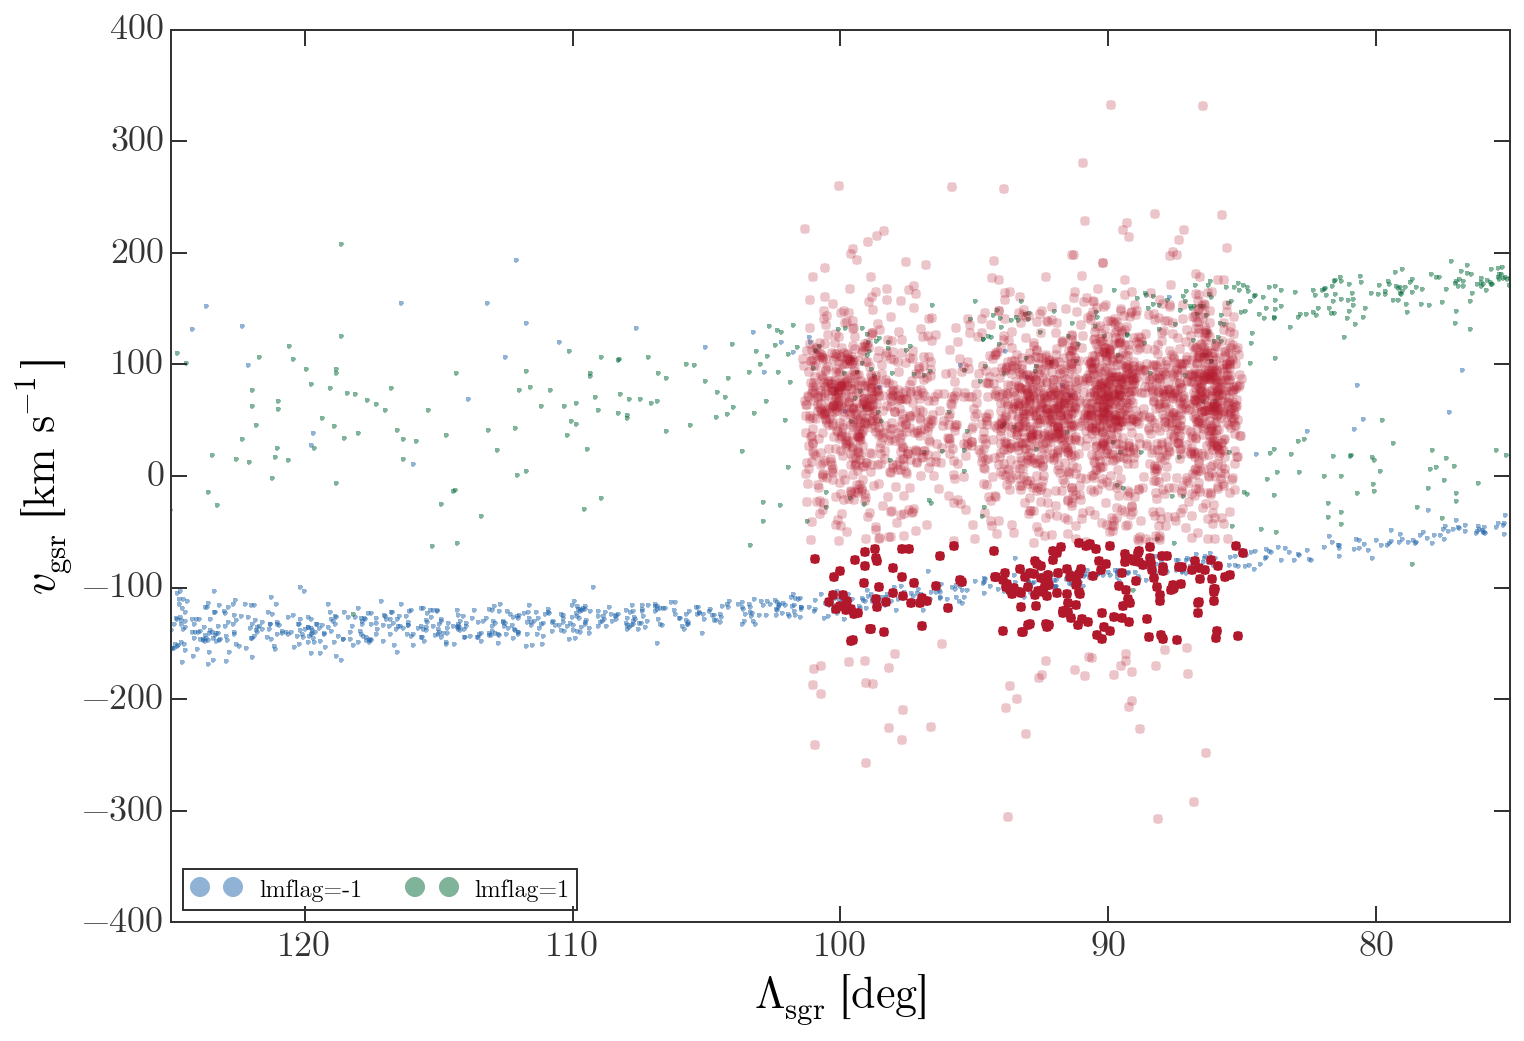

In [19]:
mask = (gstars_vgsr < -60*u.km/u.s) & (gstars_vgsr > -150*u.km/u.s)

fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree*1000, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = (lm10['Lmflag'] == lmflag) & (lm10_sgr.Beta.degree < 0.)
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10['vgsr'][ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

l, = plt.plot(gstars_sgr.Lambda.degree[mask], gstars_vgsr.value[mask], 
              marker='o', alpha=1., linestyle='none')
l, = plt.plot(gstars_sgr.Lambda.degree[~mask], gstars_vgsr.value[~mask], 
              marker='o', alpha=0.25, linestyle='none', color=l.get_color())
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(125, 75)
plt.ylim(-400, 400)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$v_{\rm gsr}$ [km s$^{-1}$]")

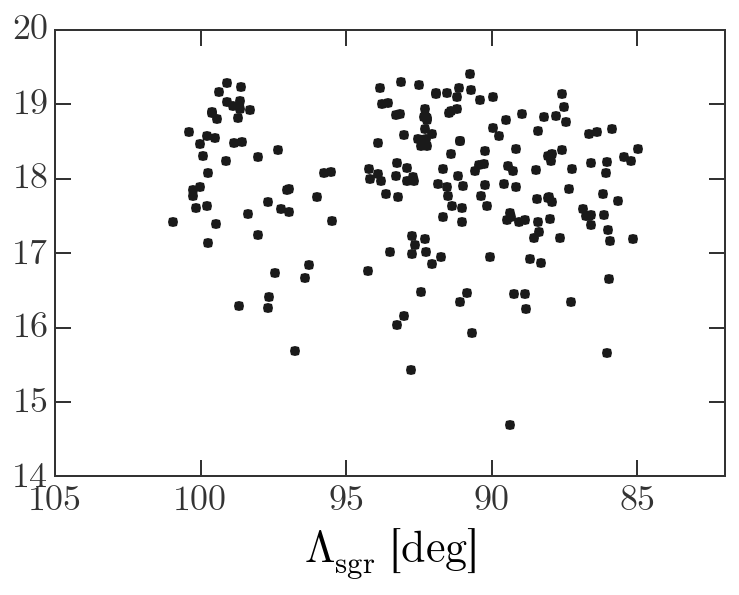

In [31]:
l, = plt.plot(gstars_sgr.Lambda.degree[mask], sdss_gstars['psfMag_g'][mask], 
              marker='o', alpha=1., linestyle='none')
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(105, 82)
# plt.ylim(-200, 0)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
# plt.ylabel(r"$v_{\rm gsr}$ [km s$^{-1}$]")

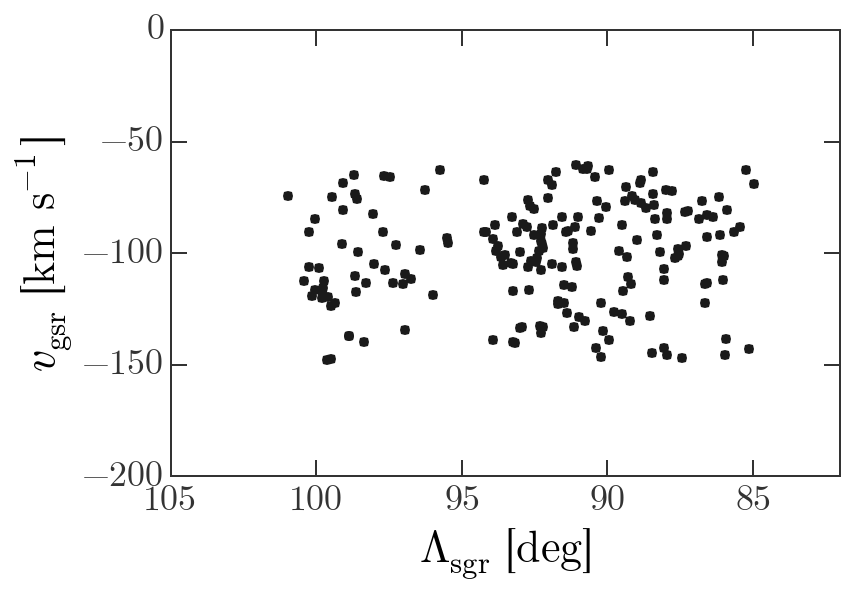

In [21]:
l, = plt.plot(gstars_sgr.Lambda.degree[mask], gstars_vgsr.value[mask], 
              marker='o', alpha=1., linestyle='none')
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(105, 82)
plt.ylim(-200, 0)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$v_{\rm gsr}$ [km s$^{-1}$]")

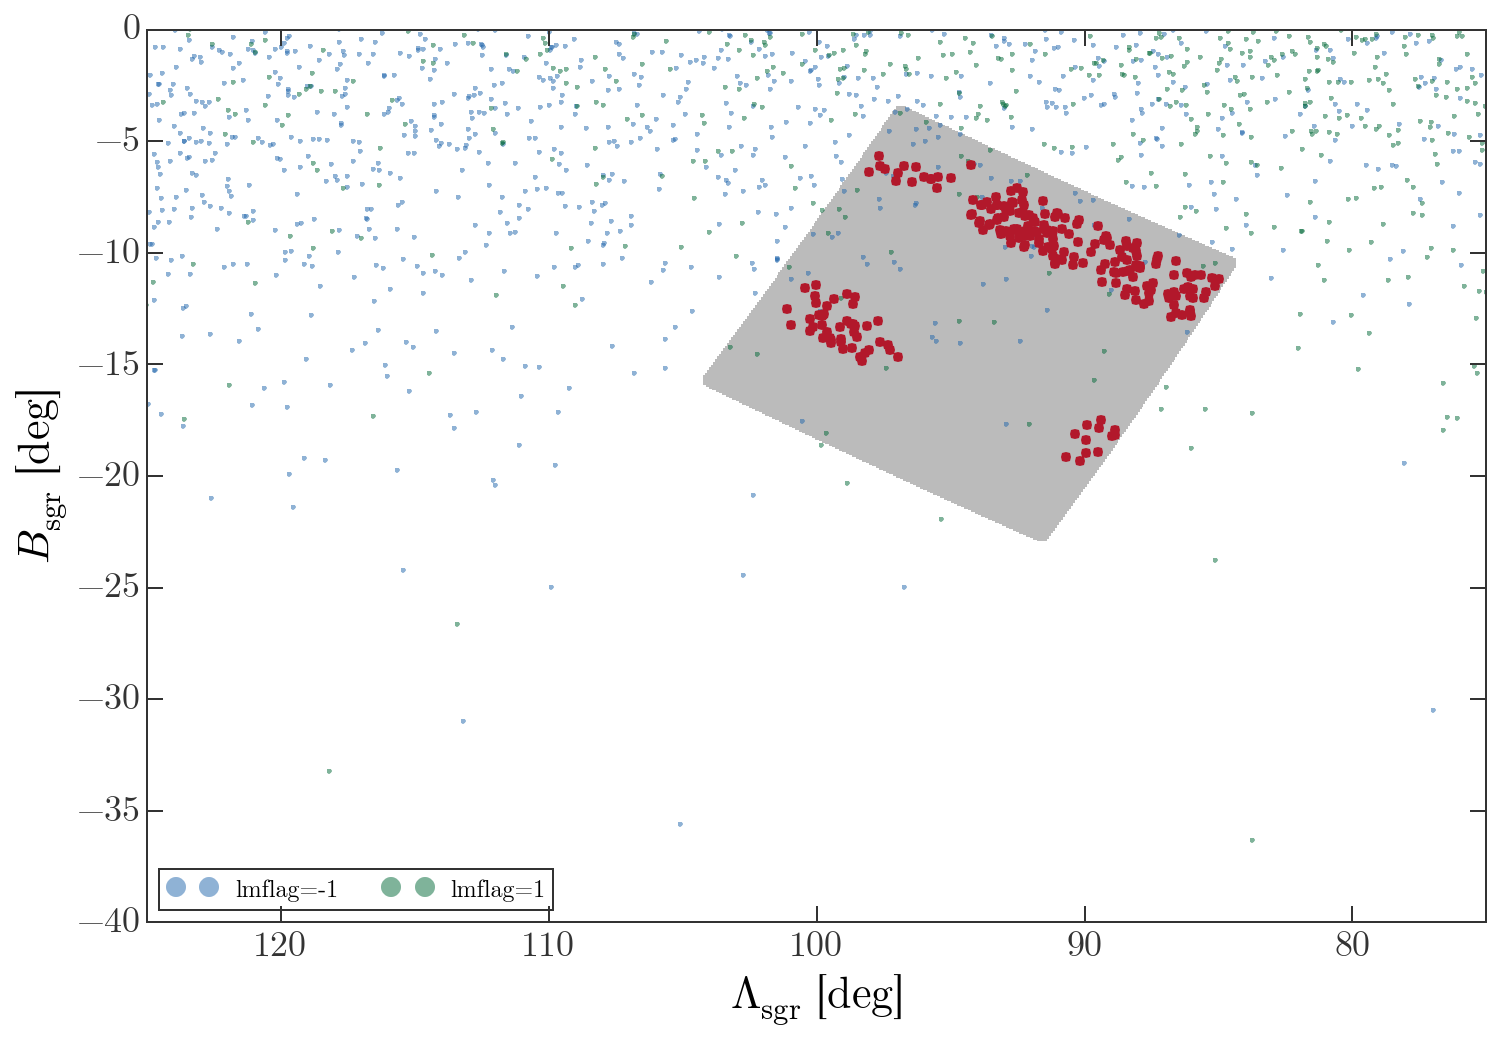

In [18]:
fig = plt.figure(figsize=(12,8))

plt.plot(field_sgr.Lambda.degree, field_sgr.Beta.degree, 
         marker='s', linestyle='none', c='#bbbbbb')

for lmflag in [-1,1]:
    ix = lm10['Lmflag'] == lmflag
    sc = plt.plot(lm10_sgr.Lambda.degree[ix], lm10_sgr.Beta.degree[ix], 
                  marker='.', linestyle='none', alpha=0.5, label='lmflag={0}'.format(lmflag))

l, = plt.plot(gstars_sgr.Lambda.degree[mask], gstars_sgr.Beta.degree[mask],
              marker='o', alpha=1., linestyle='none')
# l, = plt.plot(gstars_sgr.Lambda.degree[~mask], gstars_sgr.Beta.degree[~mask],
#               marker='o', alpha=0.25, linestyle='none', color=l.get_color())
    
plt.legend(ncol=2, loc='lower left', markerscale=4)
plt.xlim(125, 75)
plt.ylim(-40, 0)
plt.xlabel(r"$\Lambda_{\rm sgr}$ [deg]")
plt.ylabel(r"$B_{\rm sgr}$ [deg]")